In [1]:
#import neccessary tools and packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#import data set and make sure it loaded properly
df = pd.read_csv('wnba_data.csv')
df.head()

,Player,Team,Pos,G,MP,G.1,GS,MP.1,FG,FGA,...,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Natalie Achonwa,MIN,F,22,332,22,0,15.1,2.1,4.1,...,1.2,0.815,1.1,4.1,1.7,0.4,0.3,1.0,1.6,5.3
1,Julie Allemand,CHI,G,25,402,25,4,16.1,1.0,2.4,...,0.7,0.833,0.4,1.6,3.4,0.6,0.1,1.3,0.9,3.0
2,Lindsay Allen,MIN,G,9,134,9,0,14.9,2.2,4.2,...,1.4,0.923,0.0,1.6,3.4,0.2,0.0,0.8,1.2,6.7
3,Rebecca Allen,NYL,G,25,523,25,19,20.9,2.6,6.8,...,1.0,0.833,0.3,3.4,1.2,0.8,1.0,1.0,1.9,7.0
4,Yvonne Anderson,CON,G,11,101,11,0,9.2,1.1,2.4,...,0.6,1.000,0.3,0.8,1.1,0.3,0.2,1.0,1.3,3.2


## Research Questions:  
**Do certain positions tend to get more assists than others?  
Do centers/forwards have a better field goal percentage than guards?  
Is there any correlation between offensive rebounds and 2 point field goal attempts?**


In [3]:
#drop columns of data that aren't needed and make sure they were dropped properly
df.drop(df.columns[[1,3,4,5,6,7,8,9,11,12,13,14,16,17,18,19,21,23,24,25,26,27]],axis=1,inplace=True)
df.head()

,Player,Pos,FG%,2PA,ORB,AST
0,Natalie Achonwa,F,0.516,4.0,1.1,1.7
1,Julie Allemand,G,0.417,1.2,0.4,3.4
2,Lindsay Allen,G,0.526,2.7,0.0,3.4
3,Rebecca Allen,G,0.379,3.4,0.3,1.2
4,Yvonne Anderson,G,0.462,1.5,0.3,1.1


In [4]:
#correct rows that have 2 positions listed to just have 1
for i in range(885):
    if ((df['Pos'][i]=='F-C') or (df['Pos'][i]=='C-F')):
        df['Pos'][i]='C'
    elif( (df['Pos'][i]=='G-F') or (df['Pos'][i]=='F-G')):
        df['Pos'][i]='SF'

df.tail()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Player,Pos,FG%,2PA,ORB,AST
880,Maggie Lucas,G,0.000,2.0,0.0,0.0
881,Teana Muldrow,F,NaN,0.0,0.0,0.0
882,Cappie Pondexter,G,0.389,8.9,0.3,2.6
883,Aerial Powers,SF,0.450,2.7,0.6,0.9
884,Mercedes Russell,C,0.484,1.4,0.4,0.1


2.3570332480818412 1.5105263157894735 1.1134020618556701 0.976027397260274


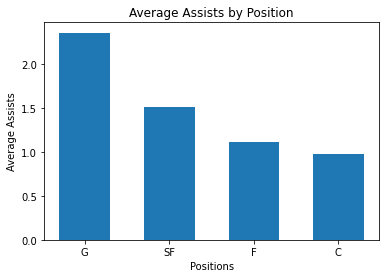

In [5]:
# Do certain positions tend to get more assists than others?

#define the indices for each position
G=df['Pos']=='G'
SF=df['Pos']=='SF'
F=df['Pos']=='F'
C=df['Pos']=='C'

#calculate average assists for each position (total number of assists / number of players in that position)
Gast = (df[G]['AST'].sum()) / df[G].shape[0]
SFast = (df[SF]['AST'].sum()) / df[SF].shape[0]
Fast = (df[F]['AST'].sum()) / df[F].shape[0]
Cast = (df[C]['AST'].sum()) / df[C].shape[0]
print(Gast, SFast, Fast, Cast)

#plot average assists for each position
plt.bar(['G','SF','F','C'],[Gast, SFast, Fast, Cast], width=0.6)
plt.xlabel("Positions")
plt.ylabel("Average Assists")
plt.title("Average Assists by Position")
plt.show()

In [6]:
# Do centers/forwards have a better field goal percentage than guards?

#calculate average field goal percentage (sum of all FG% for that position/ number of players in that position)
#indices are the same as the above cell
CFfg = (df[C]['FG%'].sum() + df[F]['FG%'].sum()) / (df[C].shape[0] + df[F].shape[0])
Gfg = (df[G]['FG%'].sum()) / df[G].shape[0]
print(CFfg, Gfg)

0.4239679633867277 0.3723324808184143


Coefficients: 
 [2.82077193]
Mean squared error: 6.37
Coefficient of determination: 0.39


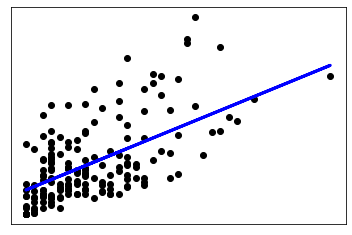

In [7]:
# Is there any correlation between offensive rebounds and 2 point field goal attempts?

# set x to Offensive rebounds and y to 2 point field goal attempts
x=np.array(df['ORB']).reshape((-1,1))
y=np.array(df['2PA'])

# Split the data into training/testing sets
x_train = x[:709]
x_test = x[709:]

y_train = y[:709]
y_test = y[709:]

# Create linear regression object and train the model using training sets
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Print the coefficients, mean squared error, and coefficient of determination
print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()